# Data wrangling notebook

In this notebook I gather data, clean it and build an adjacency matrix.

Gathering data with the help of [*parcel*](https://github.com/scrapy/parsel).

In [23]:
import pandas as pd
import numpy as np
import requests
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import geocoder
import time

from parsel import Selector
from geopy.distance import great_circle
%matplotlib inline

sns.set_style("dark")

## Web Scraping and geocoding

I take the list of cities directly from [Wikipedia page](https://en.wikipedia.org/wiki/List_of_cities_in_Ukraine), from the table. As the data there structured in a bit weird way, I only need each third element from the table, that's going to be exactly the name.

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_cities_in_Ukraine'
text = requests.get(url).text

sel = Selector(text=text)

In [3]:
table = sel.xpath('//table')

cities = []

for city in table.xpath('.//td/a/text()'):
    cities.append(city.get())

cities = cities[::3]

cities_df = pd.DataFrame()
cities_df['city'] = cities

In order to get the coordinates, I use [_geocoder_](https://github.com/DenisCarriere/geocoder) (a bit out-of-date package for today, but still works as expected). time.sleep(1) because of OpenStreetMap API restrictions on the query frequency.

In [4]:
coordinates = []
with requests.Session() as session:
    i = 462
    for city in cities:
        coordinates.append(geocoder.osm('{}'.format(city),
                                           session=session)\
                                           .latlng)
        i -= 1
        print('added {0}, {1} cities left, coords: {2}'\
              .format(city, i, coordinates[462-i-1]))

        time.sleep(1) # executed in 10 minutes, osm restrictions

added Kyiv, 461 cities left, coords: [50.4500336, 30.5241361]
added Kharkiv, 460 cities left, coords: [49.9902794, 36.2303893]
added Odessa, 459 cities left, coords: [46.4852419, 30.7433894]
added Dnipro, 458 cities left, coords: [51.9207486, 30.8249802]
added Donetsk, 457 cities left, coords: [48.0158753, 37.8013407]
added Zaporizhia, 456 cities left, coords: [47.8507859, 35.1182867]
added Lviv, 455 cities left, coords: [49.841952, 24.0315921]
added Kryvyi Rih, 454 cities left, coords: [47.9102734, 33.3917703]
added Mykolaiv, 453 cities left, coords: [46.9737705, 31.9853819]
added Mariupol, 452 cities left, coords: [47.1286047, 37.5790940286384]
added Luhansk, 451 cities left, coords: [48.5717084, 39.2973153]
added Vinnytsia, 450 cities left, coords: [49.2320162, 28.467975]
added Makiivka, 449 cities left, coords: [48.05663735, 37.9377778357717]
added Sevastopol, 448 cities left, coords: [44.6054434, 33.5220842]
added Simferopol, 447 cities left, coords: [44.9521457, 34.1024858]
added

added Zhmerynka, 340 cities left, coords: [49.0367148, 28.1138519]
added Starokostiantyniv, 339 cities left, coords: [49.75055685, 27.1939320959317]
added Avdiivka, 338 cities left, coords: [48.14384315, 37.7545606095444]
added Sambir, 337 cities left, coords: [49.5230869, 23.2141693242562]
added Boryslav, 336 cities left, coords: [49.28860165, 23.4173537521758]
added Toretsk, 335 cities left, coords: [48.3970469, 37.8501378]
added Hlukhiv, 334 cities left, coords: [51.6746617, 33.9170528011601]
added Obukhiv, 333 cities left, coords: [50.12105535, 30.6206139193335]
added Tokmak, 332 cities left, coords: [42.81774895, 75.3189939979435]
added Chuhuiv, 331 cities left, coords: [49.8363648, 36.6898157]
added Mohyliv-Podilskyi, 330 cities left, coords: [48.4470419, 27.8061264]
added Yuzhne, 329 cities left, coords: [46.6225879, 31.0995364]
added Kostopil, 328 cities left, coords: [50.88283, 26.4513]
added Synelnykove, 327 cities left, coords: [48.3269304, 35.5246984]
added Pervomaiskyi, 32

added Berezan, 219 cities left, coords: [50.3132713, 31.4689158]
added Putyvl, 218 cities left, coords: [51.3359821, 33.8715451]
added Bolhrad, 217 cities left, coords: [45.6909766, 28.608542]
added Bar, 216 cities left, coords: [48.4088704, 7.4492808]
added Svaliava, 215 cities left, coords: [48.5460735, 22.9895489]
added Bohuslav, 214 cities left, coords: [49.54765, 30.8733]
added Huliaipole, 213 cities left, coords: [47.6655382, 36.2656849]
added Zmiiv, 212 cities left, coords: [49.7029344, 36.3624539]
added Ovruch, 211 cities left, coords: [51.3259771, 28.8026718]
added Verkhniodniprovsk, 210 cities left, coords: None
added Ochakiv, 209 cities left, coords: [46.6153998, 31.5457415]
added Krasnohorivka, 208 cities left, coords: [48.00570705, 37.5175364438877]
added Kivertsi, 207 cities left, coords: [50.8340326, 25.4653557]
added Pyriatyn, 206 cities left, coords: [50.2361111, 32.5011111]
added Mykolaivka, 205 cities left, coords: [49.027519, 34.319229]
added Chasiv Yar, 204 cities 

added Radyvyliv, 95 cities left, coords: [50.12501745, 25.2605286044947]
added Vuhlehirsk, 94 cities left, coords: [48.3123049, 38.2768033986126]
added Sokyriany, 93 cities left, coords: [48.4460307, 27.411193]
added Verkhivtseve, 92 cities left, coords: [48.48404, 34.24232]
added Zalischyky, 91 cities left, coords: [48.6539024, 25.730076181579]
added Staryi Krym, 90 cities left, coords: [45.0293926, 35.0881549]
added Bilytske, 89 cities left, coords: [48.408527, 37.1834564272936]
added Pereschepyne, 88 cities left, coords: [49.01825, 35.35915]
added Andrushivka, 87 cities left, coords: [50.0301392, 29.0222111]
added Pustomyty, 86 cities left, coords: [49.7213186, 23.9152732730984]
added Horodenka, 85 cities left, coords: [48.6720598, 25.4952722]
added Tysmenytsia, 84 cities left, coords: [48.9018102, 24.8484719]
added Tiachiv, 83 cities left, coords: [48.01752315, 23.5757783661401]
added Semenivka, 82 cities left, coords: [49.598666, 33.1840853]
added Dubrovytsia, 81 cities left, coor

In [5]:
cities_df['lat'] = [coord[0] if coord != None 
                    else None for coord in coordinates]
cities_df['long'] = [coord[1] if coord != None 
                     else None for coord in coordinates]

cities_df.dropna(inplace=True)
cities_df.drop_duplicates(inplace=True)

In [6]:
# cities_df.to_csv('./data/cities_data_ukraine_raw.csv', index=False)
cities_df = pd.read_csv('./data/cities_data_ukraine_raw.csv')
cities_df.head()

,city,lat,long
0,Kyiv,50.450034,30.524136
1,Kharkiv,49.990279,36.230389
2,Odessa,46.485242,30.743389
3,Dnipro,51.920749,30.824980
4,Donetsk,48.015875,37.801341


## Data processing
Hooraayy! We got the data. Let's look what's inside.

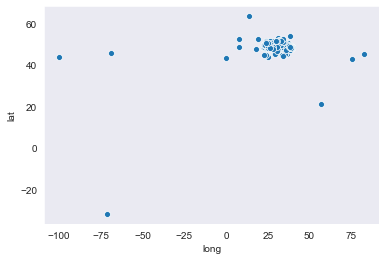

In [7]:
sns.scatterplot(data=cities_df, x='long', y='lat')

That's not looking much like Ukraine at all. We need to get rid of the outliers, obviously. Let's filter everything beyond 0.95 and 0.99 quantiles and choose the best option.

In [8]:
def add_quantile_lines(quant, x=None, y=None, draw_x=False, draw_y=False, graph_obj=plt, **kwargs):
    if draw_x:
        graph_obj.axvline(x.quantile(quant), **kwargs)
        graph_obj.axvline(x.quantile(1-quant), **kwargs)

    if draw_y:
        graph_obj.axhline(y.quantile(quant), **kwargs)
        graph_obj.axhline(y.quantile(1-quant), **kwargs)

Let's look at distribution of _lat/long_ to find out where we have more outliers and check their nature.

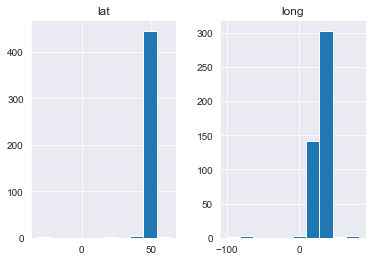

In [9]:
cities_df.hist()
plt.show()

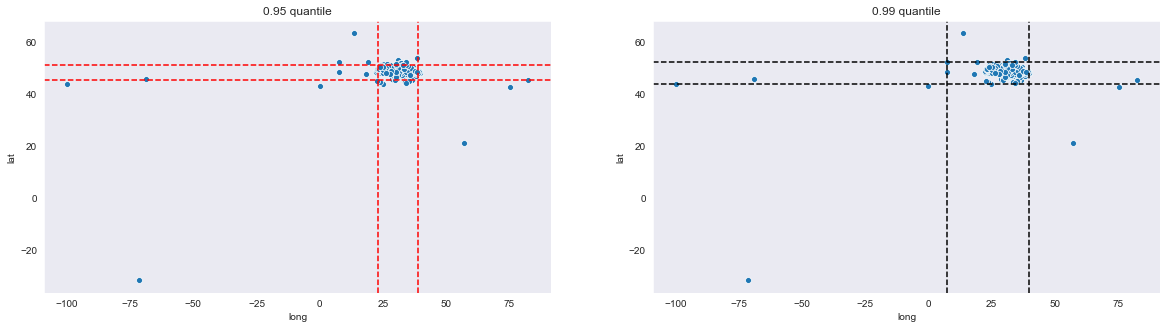

In [12]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.title('0.95 quantile')
sns.scatterplot(data=cities_df, x='long', y='lat')
add_quantile_lines(x=cities_df.long, y=cities_df.lat, quant=0.95, draw_y=True, draw_x=True,
                   color='r', linewidth=1.5, linestyle='--')

plt.subplot(1, 2, 2)
plt.title('0.99 quantile')
sns.scatterplot(data=cities_df, x='long', y='lat')
add_quantile_lines(x=cities_df.long, y=cities_df.lat, quant=0.99, draw_y=True, draw_x=True,
                   color='black', linewidth=1.5, linestyle='--')


plt.show()

The best quantile for filtration lies somewhere between *0.95* and *0.99* quantiles, so I managed to find optimal option. 

Interestingly, that if we use "best-looking" quantile from the picture (*0.95*), we lose Crimean cities on the South of the country. We may check this assumption by filtering cities by _longitude_ and then draw quantile lines to see the which cities will be filtered by _latitude_.

In [13]:
cities_df_filtered = cities_df[(cities_df.long > cities_df.long.quantile(0.02))\
                            & (cities_df.long < cities_df.long.quantile(0.98))]
cities_df_filtered.shape

(433, 3)

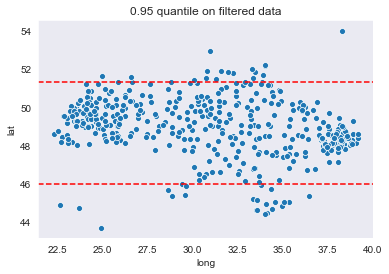

In [14]:
sns.scatterplot(data=cities_df_filtered, x='long', y='lat')
plt.title('0.95 quantile on filtered data')
add_quantile_lines(y=cities_df_filtered.lat, quant=0.95,
                   color='red', linewidth=1.5, linestyle='--', draw_y=True)

As I expected, all the Crimean city were left behind the *0.95* quantile. Thus, there's more sense to use *0.99* quantile for latitute.

In [15]:
clear_cities_df = cities_df_filtered[(cities_df.lat < cities_df.lat.quantile(0.99))\
                            & (cities_df.lat > cities_df.lat.quantile(0.01))]

/Users/suess_mann/.pyenv/versions/3.7.3/envs/venv_intern_hse/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


A bit of manual data manipulation here – I spotted unwanted and strange looking cities on the West.

(428, 3)

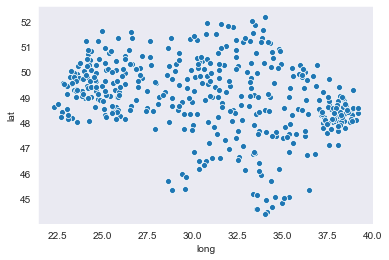

In [17]:
clear_cities_df = clear_cities_df[~((clear_cities_df.long < 20) 
                                    & (clear_cities_df.lat  < 48)\
                                    | (clear_cities_df.long < 25) 
                                    & (clear_cities_df.lat  < 45))]

sns.scatterplot(data=clear_cities_df, x='long', y='lat')

clear_cities_df.shape

Great job! Now adjacency matrix.

## Adjacency matrix
To build an adjacency matrix, I wrote a little script which goes through each city and calculates the distance using **great_circle** from [*geopy*](https://github.com/geopy/geopy).

In [ ]:
# clear_cities_df.to_csv('./data/cities_data_ukraine_clean.csv', index=False)

In [18]:
cities_df = pd.read_csv('./data/cities_data_ukraine_clean.csv', 
                        index_col=0)

cities_df = cities_df.set_index('city')

In [19]:
cities_df.head()

,lat,long
city,,
Kyiv,50.450034,30.524136
Kharkiv,49.990279,36.230389
Odessa,46.485242,30.743389
Dnipro,51.920749,30.824980
Donetsk,48.015875,37.801341


In [21]:
cities_names = cities_df.index.to_list()
cities_names[:5]

['Kyiv', 'Kharkiv', 'Odessa', 'Dnipro', 'Donetsk']

In [24]:
dij = -np.ones([len(cities_names),len(cities_names)])
dij

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

Here comes the script. In order not to make all the computations twice, I transpose resulting matrix and add it to the exitsting one. 

Though, I understand that this piece of code is not much of a pandas-way to solve the task and it needs much improvement.

In [25]:
for i, cities_names_i in enumerate(cities_names):
    city_i = np.where(cities_df.index==cities_names_i)[0][0]
    for j, cities_names_j in enumerate(cities_names):
        if i < j:
            city_j = np.where(cities_df.index==cities_names_j)[0][0]
            coord1 = cities_df['lat'][city_i], cities_df['long'][city_i]
            coord2 = cities_df['lat'][city_j], cities_df['long'][city_j]
            
            dij[i, j] = great_circle(coord1, coord2).km
        
dij = dij + dij.T
np.fill_diagonal(dij, 0)

In [26]:
dij

array([[  0.        , 408.08472407, 440.16102905, ..., 479.18001594,
         92.70758442, 110.23662448],
       [408.08472407,   0.        , 561.77926458, ..., 887.86080362,
        446.07834275, 461.24343952],
       [440.16102905, 561.77926458,   0.        , ..., 671.42353823,
        532.47390674, 548.46142846],
       ...,
       [479.18001594, 887.86080362, 671.42353823, ...,   0.        ,
        464.47723848, 456.29860839],
       [ 92.70758442, 446.07834275, 532.47390674, ..., 464.47723848,
          0.        ,  17.82777242],
       [110.23662448, 461.24343952, 548.46142846, ..., 456.29860839,
         17.82777242,   0.        ]])

In the end, we got our adjacency matrix!

**Mission completed.**

In [27]:
adj_matrix = pd.DataFrame(dij, 
                          columns=cities_df.index,
                          index=cities_df.index)

adj_matrix.head()

city,Kyiv,Kharkiv,Odessa,Dnipro,Donetsk,Zaporizhia,Lviv,Kryvyi Rih,Mykolaiv,Mariupol,...,Hlyniany,Pidhaitsi,Baturyn,Belz,Ustyluh,Hertsa,Berestechko,Uhniv,Chernobyl,Prypiat
city,,,,,,,,,,,,,,,,,,,,,
Kyiv,0.000000,408.084724,440.161029,163.874607,592.319500,440.643460,466.401893,349.941788,401.314189,633.794157,...,432.709372,406.870995,191.637638,353.558793,450.495101,400.213093,381.982537,479.180016,92.707584,110.236624
Kharkiv,408.084724,0.000000,561.779265,434.075751,246.638023,250.387917,871.614632,309.535481,457.298545,332.309876,...,837.231609,801.334992,277.297722,655.613396,859.221957,753.035718,790.479193,887.860804,446.078343,461.243440
Odessa,440.161029,561.779265,0.000000,603.430581,558.010222,362.844938,620.792366,254.212395,108.917659,523.976097,...,591.146964,518.999680,559.803357,255.796823,684.946570,384.364458,596.700183,671.423538,532.473907,548.461428
Dnipro,163.874607,434.075751,603.430581,0.000000,659.915521,545.981965,528.413441,481.252783,556.481443,720.619957,...,499.178430,497.016883,156.219756,506.696318,476.641720,529.959113,433.052603,521.838479,82.528497,76.970215
Donetsk,592.319500,246.638023,558.010222,659.915521,0.000000,199.718706,1023.673730,327.489609,449.872183,99.058853,...,988.863018,938.767643,509.059105,736.508187,1033.752290,855.772502,955.317562,1051.478762,653.479063,670.891805


In [ ]:
# adj_matrix.to_csv('./data/adj_matrix.csv')